In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Dataset/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:ylabel='Count'>

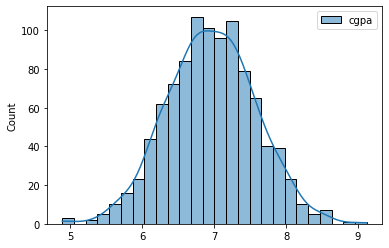

In [4]:
sns.histplot(df[['cgpa']],kde=True) # here we can use z-score nearly normal distribution

<AxesSubplot:ylabel='Count'>

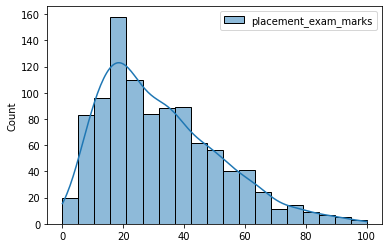

In [5]:
sns.histplot(df[['placement_exam_marks']],kde=True)  # skewed data we can't use z-score here

In [6]:
df['z-score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [9]:
df[df['z-score']>3]

,cgpa,placement_exam_marks,placed,z-score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [10]:
df[df['z-score']<-3]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [12]:
df.shape

(1000, 4)

In [11]:
# for removal of outliers we use
# 1. Trimming
# 2. Capping

In [15]:
# 1. Trimming

df[(df['z-score']<3) | (df['z-score']>-3)]

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [16]:
new_df=df[(df['z-score']<3) & (df['z-score']>-3)]

In [17]:
new_df.shape

(995, 4)

<AxesSubplot:ylabel='Count'>

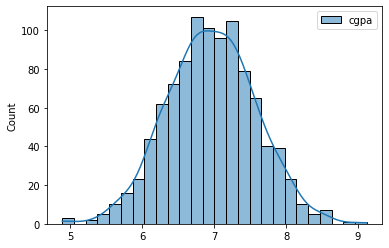

In [18]:
sns.histplot(df[['cgpa']],kde=True)

In [19]:
# 2. Capping
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [20]:
upper_limit

8.808933625397168

In [21]:
lower_limit

5.113546374602832

In [23]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,upper_limit,
    np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])
)

In [24]:
df.shape

(1000, 4)